## Research Project

* Importing relevant libraries

In [173]:
import numpy as np 
import pandas as pd
import pyreadstat as rs
from sklearn.cluster import KMeans
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

* Reading data

In [174]:
raw_data = pd.read_spss("1ResearchProjectData.sav")
raw_data

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith
...,...,...,...,...,...,...,...
212,213.0,Wesson,Male,Hispanic,Free lunch,94.0,Wesson
213,214.0,Wesson,Male,Hispanic,Paid lunch,91.0,Wesson
214,215.0,Wesson,Female,African-American,Paid lunch,53.0,Wesson
215,216.0,Wesson,Male,Hispanic,Paid lunch,57.0,Wesson


* Data cleaning

In [175]:
data_cleaned = raw_data.drop([216], axis=0)
data_cleaned

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith
...,...,...,...,...,...,...,...
211,212.0,Wesson,Male,African-American,Paid lunch,56.0,Wesson
212,213.0,Wesson,Male,Hispanic,Free lunch,94.0,Wesson
213,214.0,Wesson,Male,Hispanic,Paid lunch,91.0,Wesson
214,215.0,Wesson,Female,African-American,Paid lunch,53.0,Wesson


* Adding dummy variables

In [176]:
data_cleaned['wesson_dummy'] = data_cleaned['wesson'].map({'Ruger_Smith': 0, 'Wesson': 1})
data_cleaned['gender_dummy'] = data_cleaned['Gender'].map({'Female': 0, 'Male': 1})
data_cleaned['freeredu_dummy'] = data_cleaned['Freeredu'].map({'Free lunch': 0, 'Paid lunch': 1})
data_cleaned = data_cleaned.drop(['wesson'], axis=1)
data_cleaned = data_cleaned.drop(['Gender'], axis=1)
data_cleaned = data_cleaned.drop(['Freeredu'], axis=1)
data_cleaned

,Student,Teacher,Ethnic,Score,wesson_dummy,gender_dummy,freeredu_dummy
0,1.0,Ruger,Asian,76.0,0,0,0
1,2.0,Ruger,Hispanic,56.0,0,0,1
2,3.0,Ruger,African-American,34.0,0,0,0
3,4.0,Ruger,Asian,59.0,0,0,1
4,5.0,Ruger,Hispanic,73.0,0,1,0
...,...,...,...,...,...,...,...
211,212.0,Wesson,African-American,56.0,1,1,1
212,213.0,Wesson,Hispanic,94.0,1,1,0
213,214.0,Wesson,Hispanic,91.0,1,1,1
214,215.0,Wesson,African-American,53.0,1,0,1


* Creating a box plot to visualize different teacher's performance

In [177]:

ruger = np.where(data_cleaned['Teacher'] == 'Ruger', data_cleaned['Score'], False)
ruger = ruger[ruger != 0]
ruger_male = np.where((data_cleaned['Teacher'] == 'Ruger') & (data_cleaned['gender_dummy'] == 1), data_cleaned['Score'], False)
ruger_male = ruger_male[ruger_male != 0]
ruger_female = np.where((data_cleaned['Teacher'] == 'Ruger') & (data_cleaned['gender_dummy'] == 0), data_cleaned['Score'], False)
ruger_female = ruger_female[ruger_female != 0]

smith = np.where(data_cleaned['Teacher'] == 'Smith', data_cleaned['Score'], False)
smith = smith[smith != 0]
smith_male = np.where((data_cleaned['Teacher'] == 'Smith') & (data_cleaned['gender_dummy'] == 1), data_cleaned['Score'], False)
smith_male = smith_male[smith_male != 0]
smith_female = np.where((data_cleaned['Teacher'] == 'Smith') & (data_cleaned['gender_dummy'] == 0), data_cleaned['Score'], False)
smith_female = smith_female[smith_female != 0]

wesson = np.where(data_cleaned['Teacher'] == 'Wesson', data_cleaned['Score'], False)
wesson = wesson[wesson != 0]
wesson_male = np.where((data_cleaned['Teacher'] == 'Wesson') & (data_cleaned['gender_dummy'] == 1), data_cleaned['Score'], False)
wesson_male = wesson_male[wesson_male != 0]
wesson_female = np.where((data_cleaned['Teacher'] == 'Wesson') & (data_cleaned['gender_dummy'] == 0), data_cleaned['Score'], False)
wesson_female = wesson_female[wesson_female != 0]

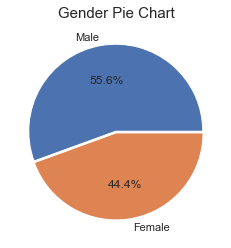

In [178]:
data_cleaned
male = np.where(data_cleaned['gender_dummy'] == 1, 1 , 0)
male = male[male != 0]
female = np.where(data_cleaned['gender_dummy'] == 0, 1 , 0)
female = female[female != 0]
len(male), len(female)
plt.pie([len(male), len(female)], (0.01, 0.01), labels=('Male', 'Female'), autopct='%1.1f%%')
plt.title('Gender Pie Chart', fontsize=15)
plt.show()


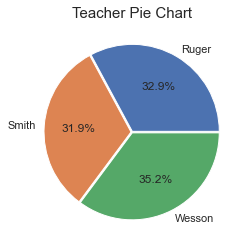

In [179]:
plt.pie([len(ruger), len(smith), len(wesson)], (0.01, 0.01, 0.01), labels=('Ruger', 'Smith', 'Wesson'), autopct='%1.1f%%')
plt.title('Teacher Pie Chart', fontsize=15)
plt.show()

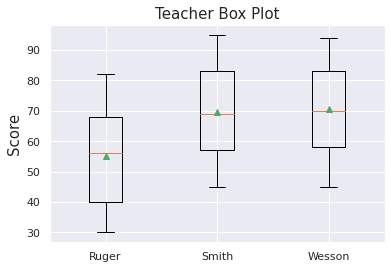

In [192]:
plt.boxplot([ruger, smith, wesson], showmeans=True, labels=('Ruger', 'Smith', 'Wesson'))
plt.ylabel('Score', fontsize=15)
plt.title('Teacher Box Plot', fontsize=15)
plt.show()

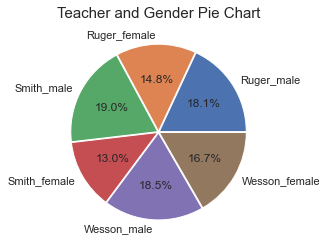

In [181]:
plt.pie([len(ruger_male), len(ruger_female), 
        len(smith_male), len(smith_female), 
        len(wesson_male), len(wesson_female)],
        (0.01, 0.01, 0.01, 0.01, 0.01, 0.01), 
        labels=('Ruger_male', 'Ruger_female', 'Smith_male', 'Smith_female', 'Wesson_male', 'Wesson_female'), 
        autopct='%1.1f%%'
        )
plt.title('Teacher and Gender Pie Chart', fontsize=15)
plt.show()

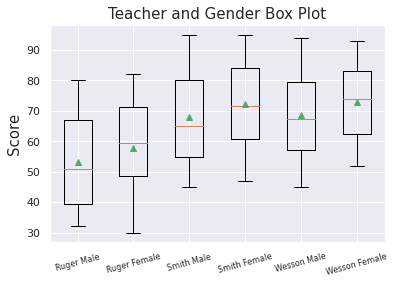

In [198]:
plt.boxplot([ruger_male, ruger_female, smith_male, smith_female, wesson_male, wesson_female], showmeans=True, 
            labels=('Ruger Male', 'Ruger Female', 'Smith Male', 'Smith Female', 'Wesson Male', 'Wesson Female'))
plt.xticks(rotation=15, fontsize=8)
plt.ylabel('Score', fontsize=15)
plt.title('Teacher and Gender Box Plot', fontsize=15)
plt.show()